## This script is used to compare two different indices that are used to quantify aggregation 
 - the mesoscale total water path variance ratio 
 
   - what variable do I need to compute this? (TWP)
     TWP: vertically integrated moisture (vapor + liquid water), this is a 2D quantity
     I need the block average TWP as well, so in which dataset can I find this?
     
      - potentially in OUT_2D/*MSE*.nc: Peter noted that some of the water path computations had a bug.. (which ones?)
        If I need to compute the TWP, I need to compute it by vertically integrating QTOT in OUT_3D/*MSE*.nc
        
        - how do have get the mesoscale variance of TWP? (mesoscale block mean - domain mean)^2
          Is mesoscale block mean already available??
       
       
   
 - the SCAI (Simple Convective Aggregation Index)
 
   - a cloud mask is needed to compute this SCAI index;
   
     how can I create such mask that is similar to the OLR given by the satellite?
     
     A cloud is given by q_c >0.01 g/kg  (QCL in the OUT_3D/*.nc)
     since QCL is a 3D variable, do I need to project this to a plane? 
     perhaps I can count to check if there is cloud whenever q_c > 0.01 g/kg exist (in any one level in the model.)
     
   - also need the regionprops function (I can make use of Janssens's python code)
 
  

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os 
from scipy import interpolate


In [13]:
%matplotlib inline

In [14]:
# specify the data path:
datadir = '/data/xchen/BB2017'

# Task #2: check the "aggregation indices"
folder1 = 'OUT_2D/S6_MSE'    
folder2 = 'OUT_3D'    # 

file_prefix = 'S6_CTL_MSE_512sqx128_250m_testf'

file_suffix_3D = '_0128_CONCAT.nc'
file_suffix_2D = '_0128.2Dbin_1.nc'



In [15]:
case_list = ['cntrl','noPCP', 'RADhomo', 'RADFLXhomo', 'RFhomoNoPCP', 'WTG']

In [16]:
# establish a dictionary to store filenames for 2D/3D experiments with differen physics:
filenames=dict()
filenames['2D']=dict()
filenames['3D']=dict()
for i, cn in enumerate(case_list):
    if cn == 'cntrl':
        filenames['2D'][cn] = file_prefix + file_suffix_2D
        filenames['3D'][cn] = file_prefix + file_suffix_3D
    else:
        filenames['2D'][cn] = file_prefix + '_' + cn + file_suffix_2D
        filenames['3D'][cn] = file_prefix + '_' + cn + file_suffix_3D
        


In [17]:
# construct path to data:
case_label = 'cntrl'
path_to_2Ddata = os.path.join(datadir, folder1, filenames['2D'][case_label])
ds_2D = xr.open_dataset(path_to_2Ddata)

path_to_3Ddata = os.path.join(datadir, folder2, filenames['3D'][case_label])
ds_3D = xr.open_dataset(path_to_3Ddata)

In [34]:
dz = np.diff(ds_3D.z)

In [35]:
ds_3D

U_ano = test.U - test.U.mean(dim=('x','y'))


(0.0, 2500.0)

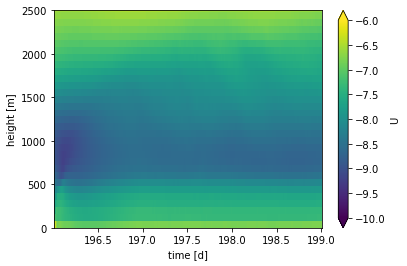

In [18]:
meanU = ds_3D.U.mean(dim=('x','y'))
meanV = ds_3D.V.mean(dim=('x','y'))
meanU.plot(y='z', vmin = -10, vmax=-6)
plt.ylim(0, 2500)
# meanW = test.W.mean(dim=('x','y'))
# meanW.plot()

(-4.5, -2.5)

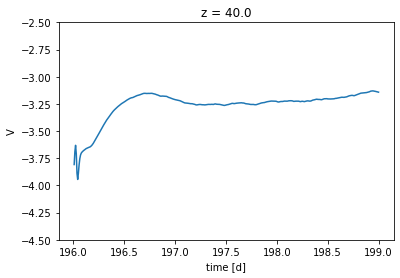

In [8]:
# domain mean wind evolution
# test=ds_3D.sel(z=i,method='nearest')
# meanV = test.V.mean(dim=('x','y'))
# meanV.plot()
# plt.ylim([-4.5,-2.5])

In [22]:
ds_3D.ZINV

AttributeError: 'Dataset' object has no attribute 'ZINV'

In [60]:
from matplotlib import cm
zlist = np.arange(1,30,4)
import ipywidgets as widgets
@widgets.interact(it=(0,len(ds_3D.time)-1,6))
def check_hodograph(it = 6):
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    zinv = ds_2D.ZI
    x0 = np.zeros(np.shape(zlist))
    y0 = x0
    ax.quiver(x0,y0, meanU[it,1:30:4], meanV[it,1:30:4], 
                  units='xy',  angles='xy', scale_units='xy', scale = 1)
    hsc =ax.scatter(meanU[it,1:30], meanV[it,1:30], c= ds_3D.z[1:30],
                                 cmap = cm.viridis, marker='o')
    fig.colorbar(hsc, ax=ax)

    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_title('hr = {0:.0f}'.format(simT[it].values))
    plt.show()
    return
  

interactive(children=(IntSlider(value=6, description='it', max=431, step=6), Output()), _dom_classes=('widget-…

In [23]:
simT = (ds_3D.time-ds_3D.time[0])*24
import ipywidgets as widgets

In [25]:
@widgets.interact(i=(0,2400,40),it = (0,431,6))
def check_uvw(i=500,it=126):
    test=ds_3D.sel(z=i,method='nearest')
    
    fig,ax = plt.subplots(1,3,figsize=(18,6))
    U_ano = test.U - test.U.mean(dim=('x','y'))
    V_ano = test.V - test.V.mean(dim=('x','y'))
    W_ano = test.W - test.W.mean(dim=('x','y'))  # domain mean.
    hm = ax[0].pcolormesh(test.x, test.y, U_ano[it,:,:].T, vmin = -1., vmax =1.,shading = 'nearest')
    #hm = ax[0].pcolormesh(test.x, test.y, test.U[it,:,:].T, shading = 'auto')
    hc = ax[0].contour(test.x, test.y,U_ano[it,:,:].T, np.arange(-1.,2.,0.2), colors='k')
    fig.colorbar(hm, ax = ax[0])
    ax[0].set_title('U @ z={0:.1f} m, t = {1:.1f} hr'.format(test.z.values, simT[it].values))
    ax[0].axis('square')

    hm2 = ax[1].pcolormesh(test.x, test.y, V_ano[it,:,:].T, vmin = -1., vmax =1., shading = 'auto') 
    #, vmin = -2, vmax =2)
    hc = ax[1].contour(test.x, test.y,V_ano[it,:,:].T, np.arange(-1.,2.,0.2), colors='k')
    fig.colorbar(hm2, ax=ax[1])
    ax[1].set_title('V @ z={0:.1f} m, t = {1:.1f} hr'.format(test.z.values, simT[it].values))
    ax[1].axis('square')
    
    hm3 = ax[2].pcolormesh(test.x, test.y, W_ano[it,:,:].T, vmin = -0.1, vmax =0.1,  shading = 'auto') 
    #, vmin = -2, vmax =2) vmin = -0.1, vmax =0.1,
    hc = ax[2].contour(test.x, test.y, W_ano[it,:,:].T, np.arange(-0.5,0.5,0.02), colors='k')
    fig.colorbar(hm3, ax=ax[2])
    ax[2].set_title('W @ z={0:.1f} m, t = {1:.1f} hr'.format(test.z.values, simT[it].values))
    ax[2].axis('square')
    
    # may be a convergence field will be better.
    
    plt.show()
    return

interactive(children=(IntSlider(value=500, description='i', max=2400, step=40), IntSlider(value=126, descripti…

In [37]:
# now read TWP from one of the experiment:

# compute the meoscale total water path variance ratio:
def compute_TWP_mesoscale_VarRatio(TWP, TWP_blockave):
    """
    This function compute the mesoscale TWP variance ratio;
    TWP_blockave is the block averged (16km^2) TWP.
    shape of the TWP matirx: [NX, NY, NT]
    """
    [NX, NY, NT] = np.shape(TWP)
    
    # computing block-averaged TWP 
    
    
    # initialize:
    TWP_var = np.zeros(np.shape(TWP))
    TWP_mvar = TWP_var
    TWPm_VarRatio = TWP_var
    
    for it in range(NT):
        TWP_var[:,:,it] = np.var(TWP[:,:,it])
        TWP_mvar[:,:,it] = (TWP_blockave[:,:,it] - np.mean(TWP[:,:,it]))**2/ (NX*NY)
        
    TWPm_VarRatio = TWP_mvar / TWP_var
    
    return TWPm_VarRatio, TWP_var, TWP_mvar
    
    
# define a function to compute the total water path: 
def compute_total_water_path(Qt, rho_a, z):
    """
    This function computes the total water path according to the following equation:
     - Wp = \int_0^{z} rho_air* Q_tot dz
       where the Q_tot is the total water mixing ratio, 
       the units of the water path is kg/m^2, consist with the units in Peter's dataset.
       
    - maybe a question to Peter: what is the appropriate density to use for this TWP integration...
    """
    integrand = rho_a * Qt
    TWP = np.trapz(integrand, z, axis=1)
    return TWP
    
# compute the SCAI index 

def compute_SCAI (cloud_mask):
    """
    Refer to Janssen's code:
    """
    SCAI = np.zeros(np.shape(cloud_mask))
    # need to develope more here
    return SCAI

In [63]:
TWP = compute_total_water_path(ds_3D.QTOT, ds_3D.RHO, ds_3D.z)

In [64]:
# compare TWP values computed from the 3D dataset and the TWP values in the 2D dataset:
TWP_peter = ds_2D.TWP.values
TWP_dif = TWP - TWP_peter

In [ ]:
# compute mesoscale ratio:
TWPm_ratio_xc = compute_TWP_mesoscale_VarRatio(TWP, TWPm)
TWPm_ratio_p = compute_TWP_mesoscale_VarRatio(TWP_peter, TWPm)

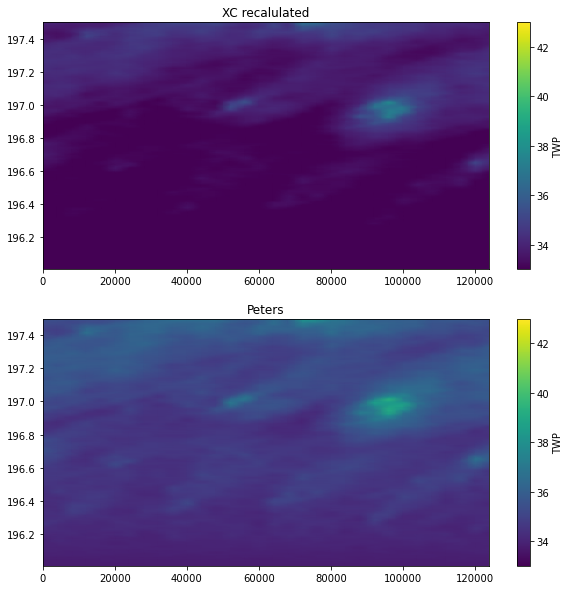

In [65]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
hm = ax[0].pcolormesh(ds_2D.x, ds_2D.time, TWP[:,:,16],shading='gouraud', vmin = 33, vmax = 43)
ax[0].set_title('XC recalulated')
hb=fig.colorbar(hm, ax=ax[0])
hb.set_label('TWP')

hm = ax[1].pcolormesh(ds_2D.x, ds_2D.time, TWP_peter[:,:,16],shading='gouraud', vmin = 33, vmax = 43)
ax[1].set_title('Peter''s')
hb = fig.colorbar(hm, ax=ax[1])
hb.set_label('TWP')


In [69]:
# compare the TWP variance:
TWP_var_xc = np.var(TWP, axis=(1,2))
TWP_var_p = np.var(TWP_peter, axis=(1,2))

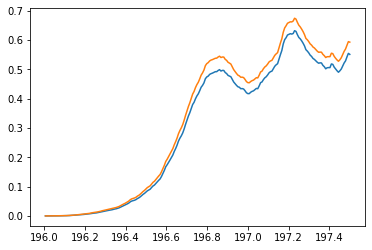

In [73]:
plt.plot(ds_3D.time, TWP_var_xc)
plt.plot(ds_2D.time, TWP_var_p)

In [ ]:
# compare the 